In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
from sklearn.model_selection import train_test_split
import nltk

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [4]:
text_roosevelt_1941 = inaugural.raw('1941-Roosevelt.txt')

In [5]:
text_kennedy_1961 = inaugural.raw('1961-Kennedy.txt')

In [6]:
text_nixon_1973 = inaugural.raw('1973-Nixon.txt')

In [7]:
text_roosevelt_1941

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [8]:
roosevelt_all_char = len(text_roosevelt_1941)
roosevelt_all_char

7571

In [9]:
roosevelt_all_char = [w for w in text_roosevelt_1941]
roosevelt_all_char

['O',
 'n',
 ' ',
 'e',
 'a',
 'c',
 'h',
 ' ',
 'n',
 'a',
 't',
 'i',
 'o',
 'n',
 'a',
 'l',
 ' ',
 'd',
 'a',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 'i',
 'n',
 'a',
 'u',
 'g',
 'u',
 'r',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 's',
 'i',
 'n',
 'c',
 'e',
 ' ',
 '1',
 '7',
 '8',
 '9',
 ',',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'r',
 'e',
 'n',
 'e',
 'w',
 'e',
 'd',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 's',
 'e',
 'n',
 's',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'e',
 'd',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 't',
 'o',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'n',
 'i',
 't',
 'e',
 'd',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 's',
 '.',
 '\n',
 '\n',
 'I',
 'n',
 ' ',
 'W',
 'a',
 's',
 'h',
 'i',
 'n',
 'g',
 't',
 'o',
 'n',
 "'",
 's',
 ' ',
 'd',
 'a',
 'y',
 ' ',
 't',
 'h',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'w',
 '

In [10]:
len(roosevelt_all_char)

7571

In [11]:
roosevelt_all_chars = inaugural.raw('1941-Roosevelt.txt')
print('Total Number of Characters in "1941-Roosevelt.txt" speech:',len(roosevelt_all_chars))

Total Number of Characters in "1941-Roosevelt.txt" speech: 7571


In [12]:
roosevelt_all_chars

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [13]:
## Let's get a word count
roosevelt_all_word = inaugural.words('1941-Roosevelt.txt')
print('Total Number of Words in "1941-Roosevelt.txt" speech:',len(roosevelt_all_word))

Total Number of Words in "1941-Roosevelt.txt" speech: 1536


In [14]:
roosevelt_all_word

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [15]:
## Let's get a word count
roosevelt_all_words = nltk.word_tokenize(text_roosevelt_1941)
print(len(roosevelt_all_words))

1526


In [16]:
roosevelt_all_words

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'s",
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'histor

In [17]:
roosevelt_all_sents=inaugural.sents('1941-Roosevelt.txt')
print('Total Number of Sentences in "1941-Roosevelt.txt" speech:',len(roosevelt_all_sents))

Total Number of Sentences in "1941-Roosevelt.txt" speech: 68


In [18]:
roosevelt_all_sents

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [19]:
## Let's get a sentence count
roosevelt_all_sent = nltk.sent_tokenize(text_roosevelt_1941)
print('Total Number of Sentences in "1941-Roosevelt.txt" speech:',len(roosevelt_all_sent))

Total Number of Sentences in "1941-Roosevelt.txt" speech: 68


In [20]:
roosevelt_all_sent

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are men wh

In [21]:
text_kennedy_1961 = inaugural.raw('1961-Kennedy.txt')

In [22]:
len(text_kennedy_1961)

7618

In [23]:
kennedy_all_chars = inaugural.raw('1961-Kennedy.txt')
print('Total Number of Characters in "1961-Kennedy.txt" speech:',len(kennedy_all_chars))

Total Number of Characters in "1961-Kennedy.txt" speech: 7618


In [24]:
kennedy_all_chars

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [25]:
## Let's get a word count
kennedy_all_word = inaugural.words('1961-Kennedy.txt')
print('Total Number of Words in "1961-Kennedy.txt" speech:',len(kennedy_all_word))

Total Number of Words in "1961-Kennedy.txt" speech: 1546


In [26]:
kennedy_all_word

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [27]:
## Let's get a word count
kennedy_all_words = nltk.word_tokenize(text_kennedy_1961)
print(len(kennedy_all_words))

1543


In [28]:
kennedy_all_words

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 'human',
 

In [29]:
kennedy_all_sents=inaugural.sents('1961-Kennedy.txt')
print('Total Number of Sentences in "1961-Kennedy.txt" speech:',len(kennedy_all_sents))

Total Number of Sentences in "1961-Kennedy.txt" speech: 52


In [30]:
kennedy_all_sents

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [31]:
## Let's get a sentence count
kennedy_all_sent = nltk.sent_tokenize(text_kennedy_1961)
print('Total Number of Sentences in "1961-Kennedy.txt" speech:',len(kennedy_all_sent))

Total Number of Sentences in "1961-Kennedy.txt" speech: 52


In [32]:
kennedy_all_sent

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been pa

In [33]:
text_nixon_1973 = inaugural.raw('1973-Nixon.txt')

In [34]:
len(text_nixon_1973)

9991

In [35]:
nixon_all_chars = inaugural.raw('1973-Nixon.txt')
print('Total Number of Characters in "1973-Nixon.txt" speech:',len(nixon_all_chars))

Total Number of Characters in "1973-Nixon.txt" speech: 9991


In [36]:
nixon_all_chars

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [37]:
## Let's get a word count
nixon_all_word = inaugural.words('1973-Nixon.txt')
print('Total Number of Words in "1973-Nixon.txt" speech:',len(nixon_all_word))

Total Number of Words in "1973-Nixon.txt" speech: 2028


In [38]:
nixon_all_word

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [39]:
## Let's get a word count
nixon_all_words = nltk.word_tokenize(text_nixon_1973)
print(len(nixon_all_words))

2006


In [40]:
nixon_all_words

['Mr.',
 'Vice',
 'President',
 ',',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'p

In [41]:
nixon_all_sents=inaugural.sents('1973-Nixon.txt')
print('Total Number of Sentences in "1973-Nixon.txt" speech:',len(nixon_all_sents))

Total Number of Sentences in "1973-Nixon.txt" speech: 69


In [42]:
nixon_all_sents

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [43]:
## Let's get a sentence count
nixon_all_sent1 = nltk.sent_tokenize(text_nixon_1973)
print('Total Number of Sentences in "1973-Nixon.txt" speech:',len(nixon_all_sent1))

Total Number of Sentences in "1973-Nixon.txt" speech: 68


In [44]:
nixon_all_sent1

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize ou

## Removing Punctuations

In [45]:
punct= list(string.punctuation)+['--']

In [46]:
roosevelt_all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
roosevelt_all_words_clean1 = [word for word in roosevelt_all_words if word not in punct]
roosevelt_all_words_clean1

['on',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'united',
 'states',
 'in',
 'washington',
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 'in',
 'lincoln',
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'nation',
 'from',
 'disruption',
 'from',
 'within',
 'in',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 'to',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'history',
 'has',
 'been',
 'and',
 'to',
 'rediscover',


In [47]:
kennedy_all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
kennedy_all_words_clean1 = [word for word in kennedy_all_words if word not in punct]
kennedy_all_words_clean1

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 'symbolizing',
 'an',
 'end',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 'signifying',
 'renewal',
 'as',
 'well',
 'as',
 'change',
 'for',
 'i',
 'have',
 'sworn',
 'i',
 'before',
 'you',
 'and',
 'almighty',
 'god',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 'the',
 'world',
 'is',
 'very',
 'different',
 'now',
 'for',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 'human',
 'poverty',
 'and',
 'all',
 'forms',
 'of',
 'human',
 'life',
 'and',
 'yet',
 'the',
 'same',
 're

In [48]:
nixon_all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
nixon_all_words_clean1 = [word for word in nixon_all_words if word not in punct]
nixon_all_words_clean1

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 'when',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 'america',
 'was',
 'bleak',
 'in',
 'spirit',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 'as',
 'we',
 'meet',
 'here',
 'today',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 'the',
 'central',
 'question',
 'before',
 'us',
 'is',
 'how',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 'let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'postwar',
 'periods',
 'have',
 'so',
 'often',
 'been',
 'a',
 'time',
 'of',
 're

## Removing Stopwords

In [49]:
stopwords = nltk.corpus.stopwords.words('english')

In [50]:
roosevelt_all_words_clean = [word for word in roosevelt_all_words_clean1 if word not in stopwords]
roosevelt_all_words_clean

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [51]:
kennedy_all_words_clean = [word for word in kennedy_all_words_clean1 if word not in stopwords]
kennedy_all_words_clean

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [52]:
nixon_all_words_clean = [word for word in nixon_all_words_clean1 if word not in stopwords]
nixon_all_words_clean

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


In [53]:
roosevelt_all_words_freq = nltk.FreqDist(roosevelt_all_words_clean)
roosevelt_word_features = [item[0] for item in roosevelt_all_words_freq.most_common(3)]

In [54]:
print('The frequent occuring words in "1941-Roosevelt.txt" speech:')
roosevelt_all_words_freq

The frequent occuring words in "1941-Roosevelt.txt" speech:


FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [55]:
print('The top 3 frequent occuring words in "1941-Roosevelt.txt" speech:')
roosevelt_word_features

The top 3 frequent occuring words in "1941-Roosevelt.txt" speech:


['nation', 'know', 'spirit']

In [56]:
kennedy_all_words_freq = nltk.FreqDist(kennedy_all_words_clean)
kennedy_word_features = [item[0] for item in kennedy_all_words_freq.most_common(3)]

In [57]:
print('The frequent occuring words in "1961-Kennedy.txt" speech:')
kennedy_all_words_freq

The frequent occuring words in "1961-Kennedy.txt" speech:


FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [58]:
print('The top 3 frequent occuring words in "1961-Kennedy.txt" speech:')
kennedy_word_features

The top 3 frequent occuring words in "1961-Kennedy.txt" speech:


['let', 'us', 'world']

In [59]:
nixon_all_words_freq = nltk.FreqDist(nixon_all_words_clean)
nixon_word_features = [item[0] for item in nixon_all_words_freq.most_common(3)]

In [60]:
print('The frequent occuring words in "1973-Nixon.txt" speech:')
nixon_all_words_freq

The frequent occuring words in "1973-Nixon.txt" speech:


FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [61]:
print('The top 3 frequent occuring words in "1973-Nixon.txt" speech:')
nixon_word_features

The top 3 frequent occuring words in "1973-Nixon.txt" speech:


['us', 'let', 'america']

In [62]:
stopwords = nltk.corpus.stopwords.words('english') +['let','us']

In [63]:
roosevelt_all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
roosevelt_all_words_clean = [word for word in roosevelt_all_words_clean1 if word not in stopwords]
roosevelt_all_words_clean

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained',
 

In [64]:
kennedy_all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
kennedy_all_words_clean = [word for word in kennedy_all_words_clean1 if word not in stopwords]
kennedy_all_words_clean

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike',
 'torc

In [65]:
nixon_all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
nixon_all_words_clean = [word for word in nixon_all_words_clean1 if word not in stopwords]
nixon_all_words_clean

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'shall',
 'use',
 'peace',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',
 'revitalize',
 'traditional',
 'frie

## Frequent Words

In [66]:
roosevelt_all_words_freq = nltk.FreqDist(roosevelt_all_words_clean)
roosevelt_word_features = [item[0] for item in roosevelt_all_words_freq.most_common(3)]

In [67]:
print('The frequent occuring words in "1941-Roosevelt.txt" speech:')
roosevelt_all_words_freq

The frequent occuring words in "1941-Roosevelt.txt" speech:


FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, 'human': 5, ...})

In [68]:
print('The top 3 frequent occuring words in "1941-Roosevelt.txt" speech:')
roosevelt_word_features

The top 3 frequent occuring words in "1941-Roosevelt.txt" speech:


['nation', 'know', 'spirit']

In [69]:
kennedy_all_words_freq = nltk.FreqDist(kennedy_all_words_clean)
kennedy_word_features = [item[0] for item in kennedy_all_words_freq.most_common(3)]

In [70]:
print('The frequent occuring words in "1961-Kennedy.txt" speech:')
kennedy_all_words_freq

The frequent occuring words in "1961-Kennedy.txt" speech:


FreqDist({'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, 'nations': 5, 'ask': 5, ...})

In [71]:
print('The top 3 frequent occuring words in "1961-Kennedy.txt" speech:')
kennedy_word_features

The top 3 frequent occuring words in "1961-Kennedy.txt" speech:


['world', 'sides', 'new']

In [72]:
nixon_all_words_freq = nltk.FreqDist(nixon_all_words_clean)
nixon_word_features = [item[0] for item in nixon_all_words_freq.most_common(3)]

In [73]:
print('The frequent occuring words in "1973-Nixon.txt" speech:')
nixon_all_words_freq

The frequent occuring words in "1973-Nixon.txt" speech:


FreqDist({'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, 'home': 9, 'abroad': 8, ...})

In [74]:
print('The top 3 frequent occuring words in "1973-Nixon.txt" speech:')
nixon_word_features

The top 3 frequent occuring words in "1973-Nixon.txt" speech:


['america', 'peace', 'world']

## Word Cloud

In [75]:
r_wc_a = ' '.join(roosevelt_all_words_clean1)
r_wc_a

'on each national day of inauguration since 1789 the people have renewed their sense of dedication to the united states in washington s day the task of the people was to create and weld together a nation in lincoln s day the task of the people was to preserve that nation from disruption from within in this day the task of the people is to save that nation and its institutions from disruption from without to us there has come a time in the midst of swift happenings to pause for a moment and take stock to recall what our place in history has been and to rediscover what we are and what we may be if we do not we risk the real peril of inaction lives of nations are determined not by the count of years but by the lifetime of the human spirit the life of a man is three score years and ten a little more a little less the life of a nation is the fullness of the measure of its will to live there are men who doubt this there are men who believe that democracy as a form of government and a frame o

Word Cloud for President Franklin D. Roosevelt-1941 speech (after cleaning)!!


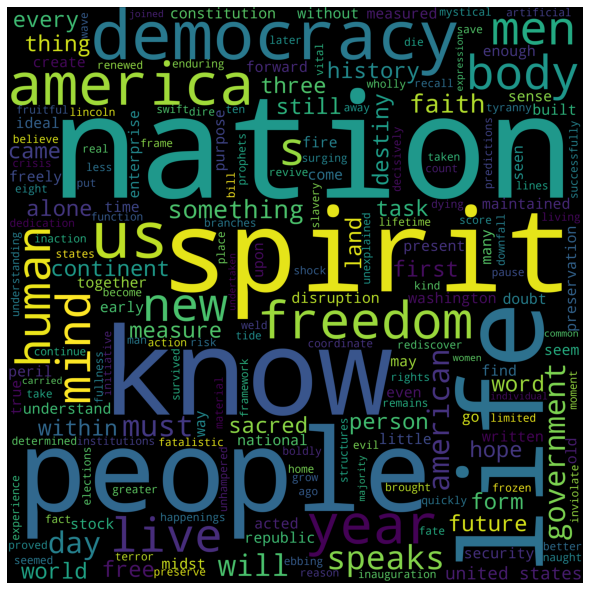

In [76]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(r_wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Franklin D. Roosevelt-1941 speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

In [77]:
k_wc_a = ' '.join(kennedy_all_words_clean1)
k_wc_a

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom symbolizing an end as well as a beginning signifying renewal as well as change for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago the world is very different now for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe the belief that the rights of man come not from the generosity of the state but from the hand of god we dare not forget today that we are the heirs of that first revolution let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of americans born in this centu

Word Cloud for President John F. Kennedy-1961 speech (after cleaning)!!


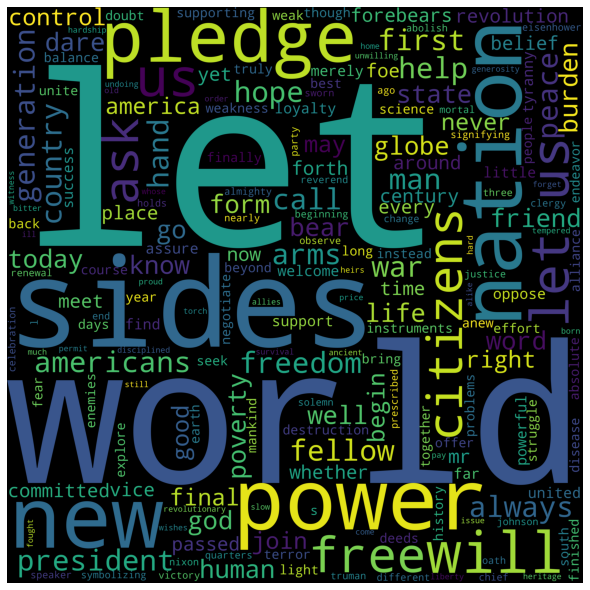

In [78]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(k_wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President John F. Kennedy-1961 speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

In [79]:
n_wc_a = ' '.join(nixon_all_words_clean1)
n_wc_a

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together when we met here four years ago america was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home as we meet here today we stand on the threshold of a new era of peace in the world the central question before us is how shall we use that peace let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad let us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of america as we enter our third century as a nation this past year saw far reaching results from our new policies for peace by continuing to revitalize our traditional friendships and by our missions to pe

Word Cloud for President Richard Nixon-1973 speech (after cleaning)!!


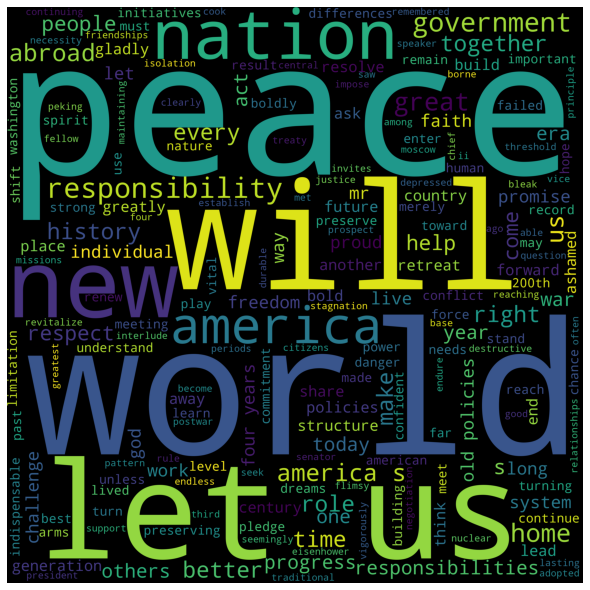

In [80]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(n_wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Richard Nixon-1973 speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

In [81]:
print('Total Number of Characters in "1941-Roosevelt.txt" speech:',len(roosevelt_all_chars))
print('Total Number of Words in "1941-Roosevelt.txt" speech:',len(roosevelt_all_word))
print('Total Number of Sentences in "1941-Roosevelt.txt" speech:',len(roosevelt_all_sents))

Total Number of Characters in "1941-Roosevelt.txt" speech: 7571
Total Number of Words in "1941-Roosevelt.txt" speech: 1536
Total Number of Sentences in "1941-Roosevelt.txt" speech: 68


In [82]:
print('Total Number of Characters in "1961-Kennedy.txt" speech:',len(kennedy_all_chars))
print('Total Number of Words in "1961-Kennedy.txt" speech:',len(kennedy_all_word))
print('Total Number of Sentences in "1961-Kennedy.txt" speech:',len(kennedy_all_sents))

Total Number of Characters in "1961-Kennedy.txt" speech: 7618
Total Number of Words in "1961-Kennedy.txt" speech: 1546
Total Number of Sentences in "1961-Kennedy.txt" speech: 52


In [83]:
print('Total Number of Characters in "1973-Nixon.txt" speech:',len(nixon_all_chars))
print('Total Number of Words in "1973-Nixon.txt" speech:',len(nixon_all_word))
print('Total Number of Sentences in "1973-Nixon.txt" speech:',len(nixon_all_sents))

Total Number of Characters in "1973-Nixon.txt" speech: 9991
Total Number of Words in "1973-Nixon.txt" speech: 2028
Total Number of Sentences in "1973-Nixon.txt" speech: 69


In [88]:
print('After removing Punctuations and StopWords in "1941-Roosevelt.txt" speech:',roosevelt_all_words_clean)

After removing Punctuations and StopWords in "1941-Roosevelt.txt" speech: ['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyrann

In [90]:
print('After removing Punctuations and StopWords in "1961-Kennedy.txt" speech:',kennedy_all_words_clean)

After removing Punctuations and StopWords in "1961-Kennedy.txt" speech: ['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new'

In [91]:
print('After removing Punctuations and StopWords in "1973-Nixon.txt" speech:',nixon_all_words_clean)

After removing Punctuations and StopWords in "1973-Nixon.txt" speech: ['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'shall', 'use', 'peace', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions',